## Will be adding explanation soon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Support Vector Classifier

In [2]:
class SVC:
  def __init__(self, learning_rate=0.001, max_iters=1000, l=0.001):
    self.learning_rate = learning_rate
    self.max_iters = max_iters
    self.l = l
    self.intercept_ = None
    self.coef_ = None
  
  def fit(self, X, y):
    y_tmp = self._sign(y)
    n_samples, n_features = np.shape(X)

    self.intercept_ = 0
    self.coef_ = np.zeros(n_features)

    for _ in range(self.max_iters):
      for counter, curr_sample in enumerate(X):
        coef_derivative_offset = 0

        if y_tmp[counter]*(np.dot(curr_sample, self.coef_) - self.intercept_) < 1:
          self.intercept_ -= y_tmp[counter]*self.learning_rate
          coef_derivative_offset = np.dot(curr_sample, y_tmp[counter])
        
        self.coef_ -= ((2*self.l*self.coef_) - coef_derivative_offset)*self.learning_rate
  
  def predict(self, X):
    return self._unSign(np.dot(X, self.coef_) - self.intercept_)
  
  def _sign(self, y):
    return [-1 if y[i] <= 0 else 1 for i in range(len(y))]
  
  def _unSign(self, y):
    return np.array([0 if y[i] <= 0 else 1 for i in range(len(y))])

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
classifier = SVC()
classifier.fit(X_train, y_train)

In [7]:
y_pred = classifier.predict(X_test)

## Visualising the training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


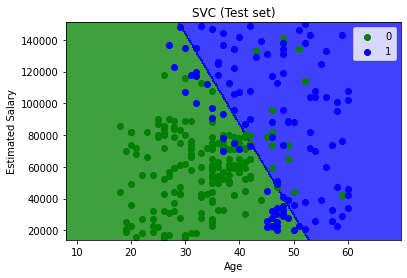

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(('green', 'blue'))
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25), np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = cmap(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


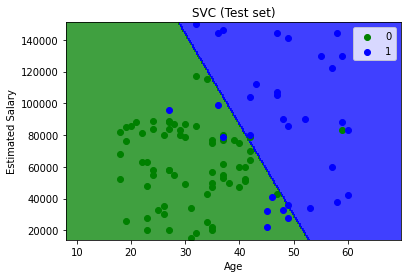

In [9]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(('green', 'blue'))
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25), np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = cmap(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Accuracy Score

In [10]:
def accuracy(y_true, y_pred):
  return sum(y_true == y_pred) / len(y_true)

In [11]:
print(accuracy(y_test, y_pred))

0.9
